In [175]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 

In [176]:
df = pd.read_csv('train.csv', header = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [177]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Age median is 28.0


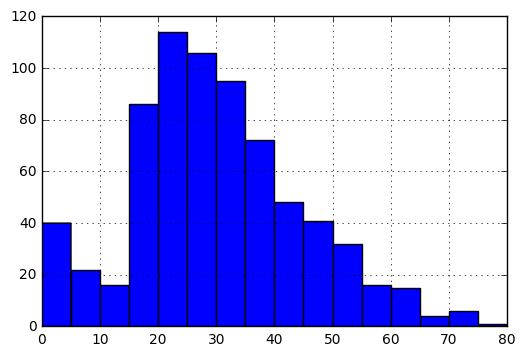

In [178]:
print "Age median is", df['Age'].median()
df['Age'].hist(bins=16, range=(0, 80))

In [179]:
df['Gender'] = df['Sex'].map({ 'female': 0, 'male': 1 }).astype(int)

In [180]:
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        condition = (df['Gender'] == i) & (df['Pclass'] == j + 1)
        median_ages[i, j] = df[condition]['Age'].dropna().median()
df['AgeFill'] = df['Age']
for i in range(0, 2):
    for j in range(0, 3):
        condition = (df['Age'].isnull()) & (df['Gender'] == i) & (df['Pclass'] == j+1)
        df.loc[condition, 'AgeFill'] = median_ages[i, j]

In [181]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [182]:
df['Age*Class'] = df['AgeFill'] * df['Pclass']

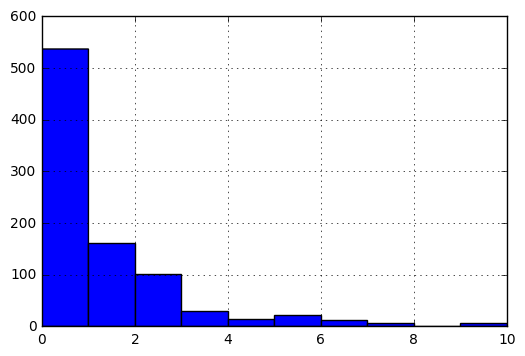

In [183]:
df['FamilySize'].hist()

In [184]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [185]:
df = df.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], axis=1)
df = df.dropna()

In [186]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,FamilySize,Age*Class
0,0,3,1,0,7.2500,1,22.0,1,66.0
1,1,1,1,0,71.2833,0,38.0,1,38.0
2,1,3,0,0,7.9250,0,26.0,0,78.0
3,1,1,1,0,53.1000,0,35.0,1,35.0
4,0,3,0,0,8.0500,1,35.0,0,105.0


In [187]:
train_data = df.values
train_data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Gender        891 non-null int64
AgeFill       891 non-null float64
FamilySize    891 non-null int64
Age*Class     891 non-null float64
dtypes: float64(3), int64(6)
memory usage: 69.6 KB


In [188]:
test_df = pd.read_csv('test.csv', header=0)
test_df['Gender'] = test_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        condition = (test_df['Gender'] == i) & (test_df['Pclass'] == j + 1)
        median_ages[i, j] = test_df[condition]['Age'].dropna().median()

test_df['AgeFill'] = test_df['Age']

for i in range(0, 2):
    for j in range(0, 3):
        condition = (test_df['Age'].isnull()) & (test_df['Gender'] == i) & (test_df['Pclass'] == j+1)
        test_df.loc[condition, 'AgeFill'] = median_ages[i, j]

if len(test_df.Fare[ test_df.Fare.isnull() ]) > 0:
    median_fare = np.zeros(3)
    for f in range(0,3):
        median_fare[f] = test_df[ test_df.Pclass == f+1 ]['Fare'].dropna().median()
    for f in range(0,3):
        test_df.loc[ (test_df.Fare.isnull()) & (test_df.Pclass == f+1 ), 'Fare'] = median_fare[f]        
        
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']
test_df['Age*Class'] = test_df['AgeFill'] * test_df['Pclass']

ids = test_df['PassengerId'].values
test_df = test_df.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], axis=1)

test_data = test_df.values
test_df.head()

,Pclass,SibSp,Parch,Fare,Gender,AgeFill,FamilySize,Age*Class
0,3,0,0,7.8292,1,34.5,0,103.5
1,3,1,0,7.0000,0,47.0,1,141.0
2,2,0,0,9.6875,1,62.0,0,124.0
3,3,0,0,8.6625,1,27.0,0,81.0
4,3,1,1,12.2875,0,22.0,2,66.0


In [189]:
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(train_data[0::, 1::], train_data[0::,0])

In [190]:
output = forest.predict(test_data).astype(int)
output.size

418

In [191]:
predictions_file = open("myfirstforest.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()